# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [32]:
import math
import sys

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [34]:
# YOUR CODE HERE
url = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz"

df = pd.read_csv(url, compression="gzip", sep="\t")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [35]:
# YOUR CODE HERE
print(df.shape)


(4898, 12)


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  target                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [37]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Column description:

*Fixed acidity:Amount of non volatile acids in the wine


*Volatile aciditiy:Acids that evaporate easily

*Citric Acid:A natural acid that adds freshness and flavor

*residual sugar:Sugar left after fermentation

*Chlorides: Salt content in the wine

*Free sulfur dioxide : sulfur dioxide that is not chemically bound

*total sulfur dioxide: Total sulfur dioxide free + bound in the wine

*Density: Indicates alcohol and sugar levels

*Ph: Measures the acidity

*sulphates: Additives that enhance preservation and bitterness.

*alcohol: Alcohol percentage.

YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

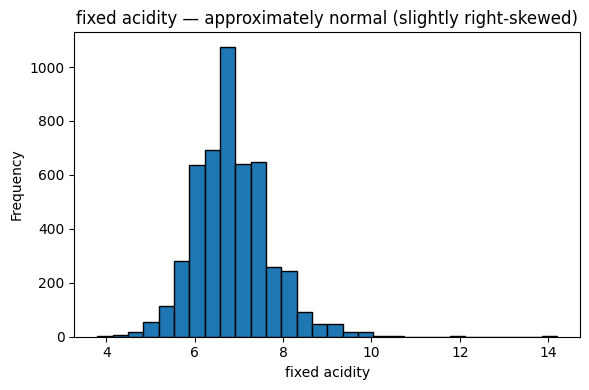

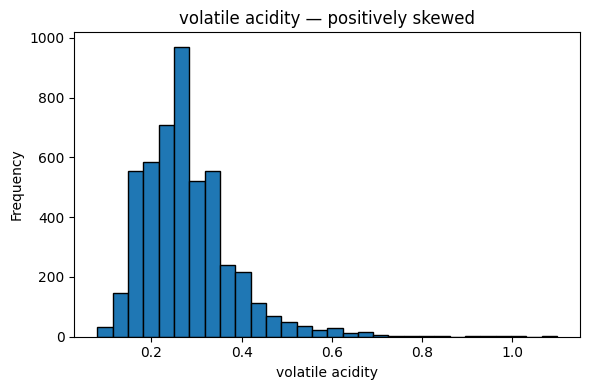

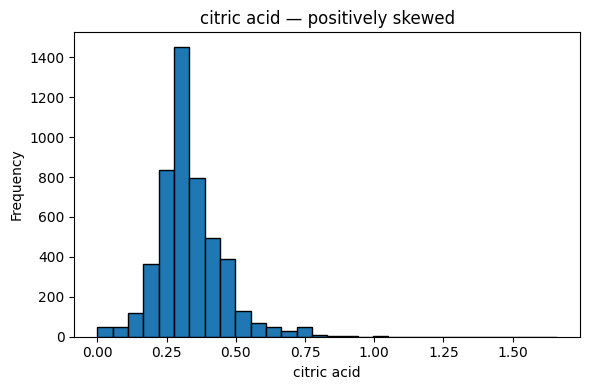

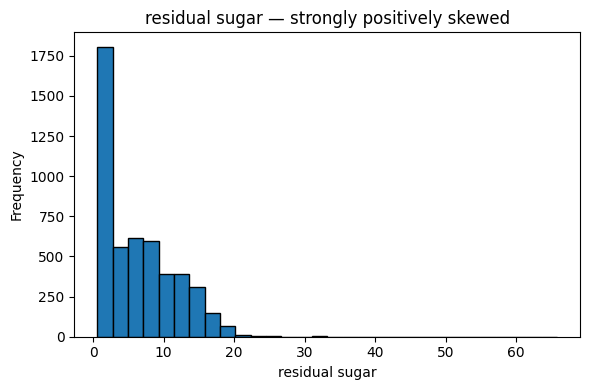

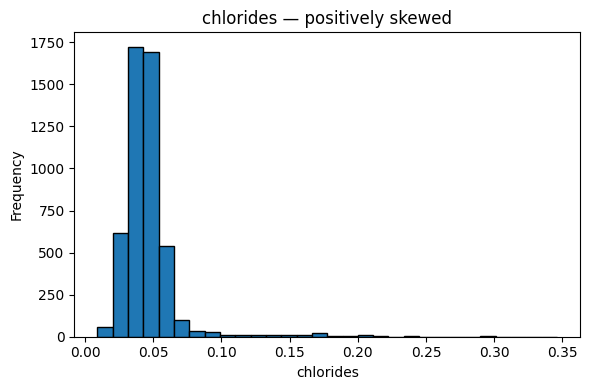

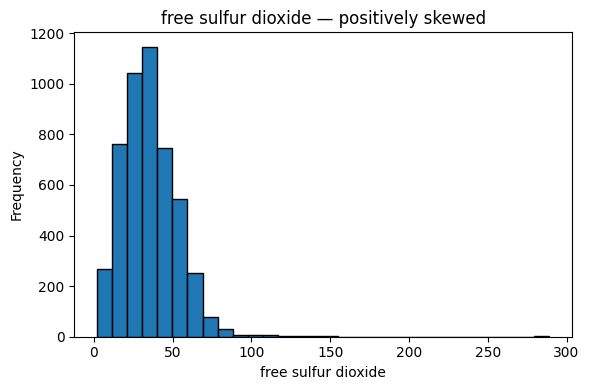

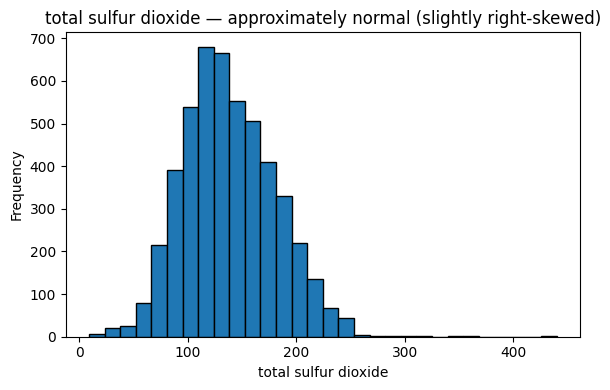

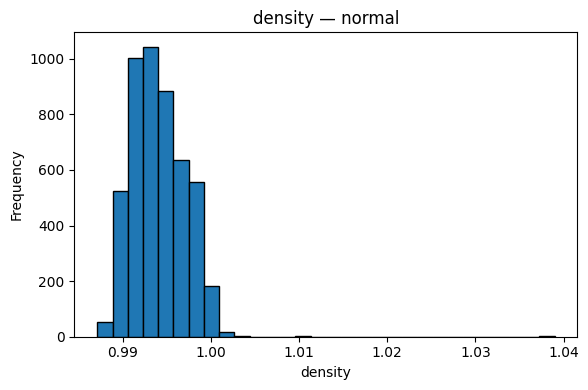

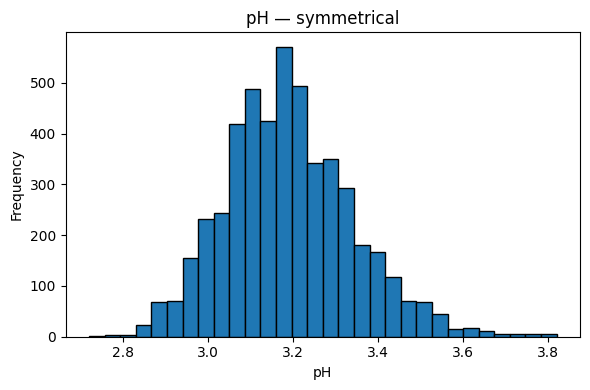

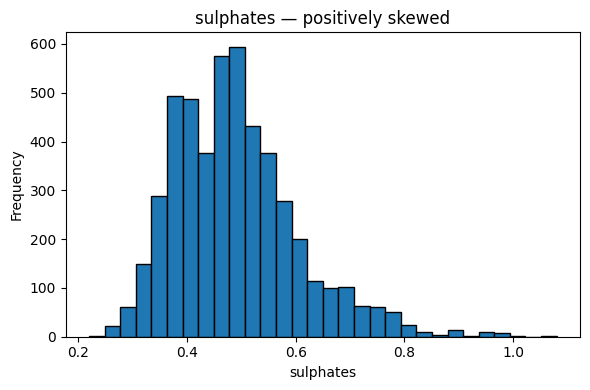

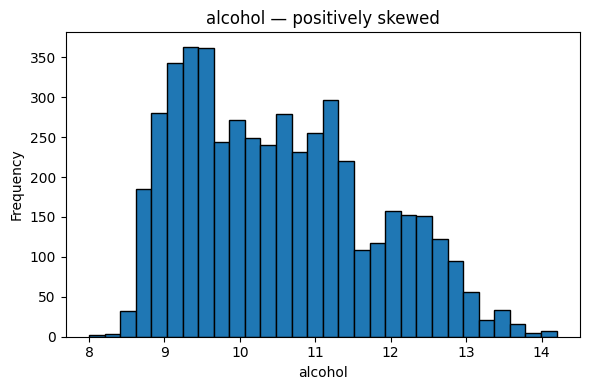

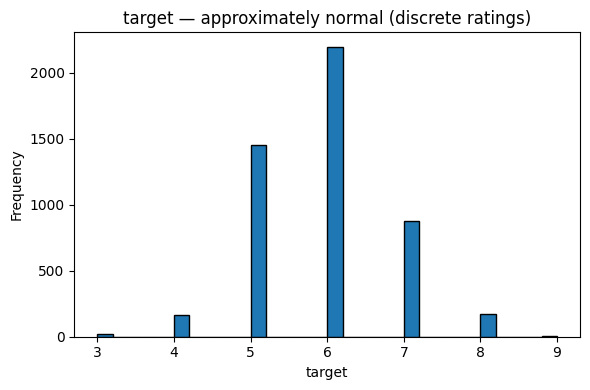

In [38]:
# YOUR CODE HERE
dist_labels = {
    "fixed acidity": "approximately normal (slightly right-skewed)",
    "volatile acidity": "positively skewed",
    "citric acid": "positively skewed",
    "residual sugar": "strongly positively skewed",
    "chlorides": "positively skewed",
    "free sulfur dioxide": "positively skewed",
    "total sulfur dioxide": "approximately normal (slightly right-skewed)",
    "density": "normal",
    "pH": "symmetrical",
    "sulphates": "positively skewed",
    "alcohol": "positively skewed",
    "target": "approximately normal (discrete ratings)"
}

for col in df.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"{col} — {dist_labels[col]}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

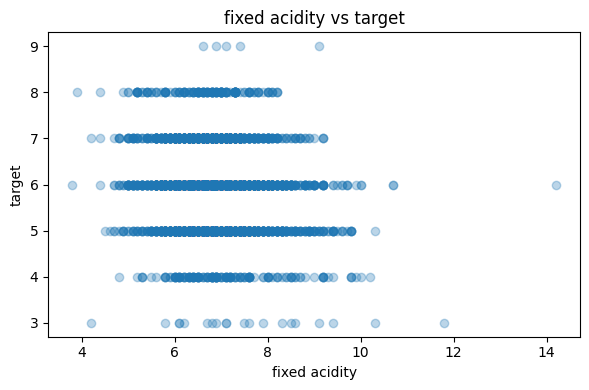

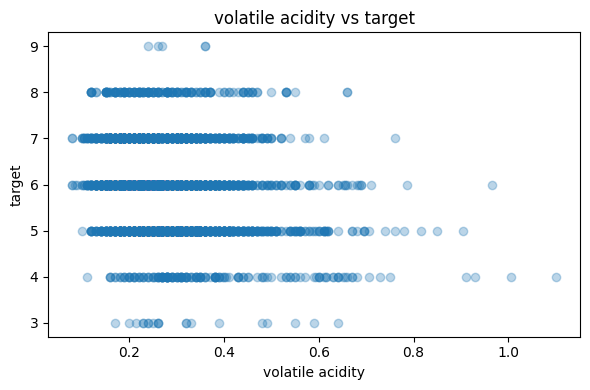

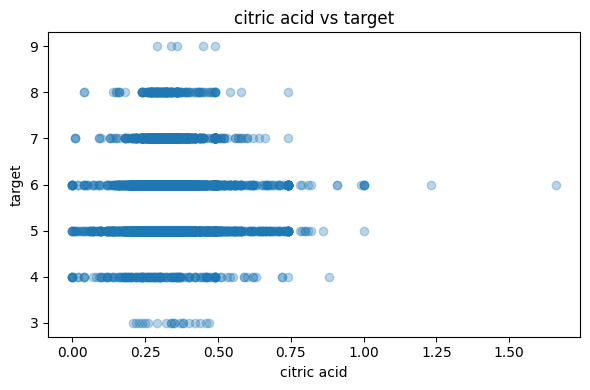

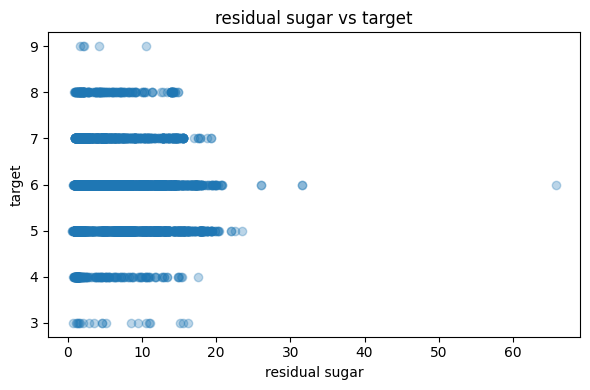

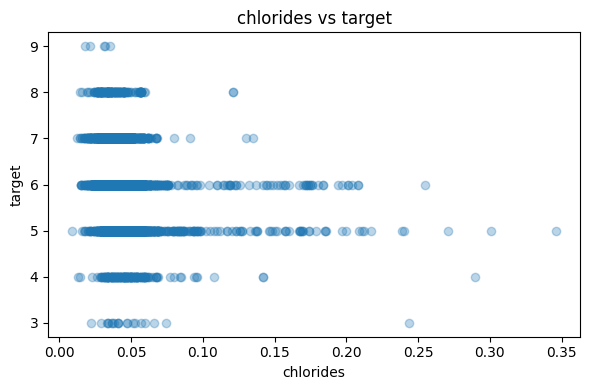

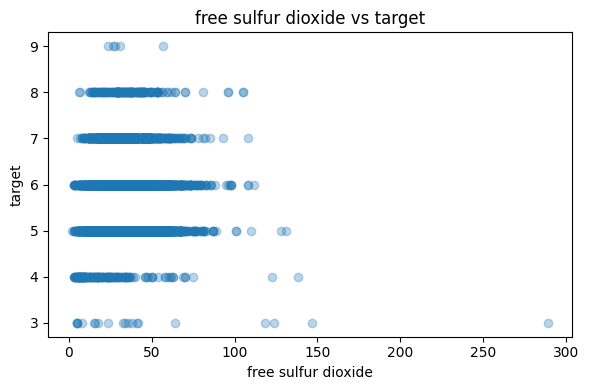

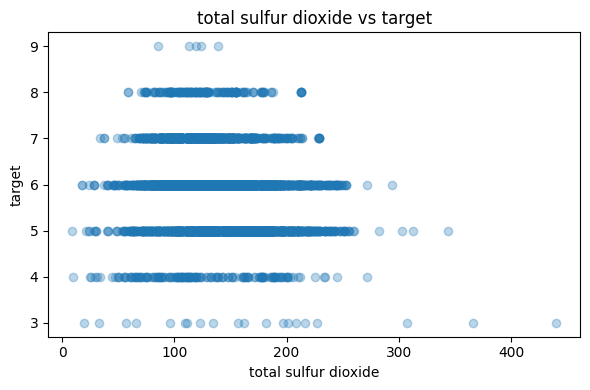

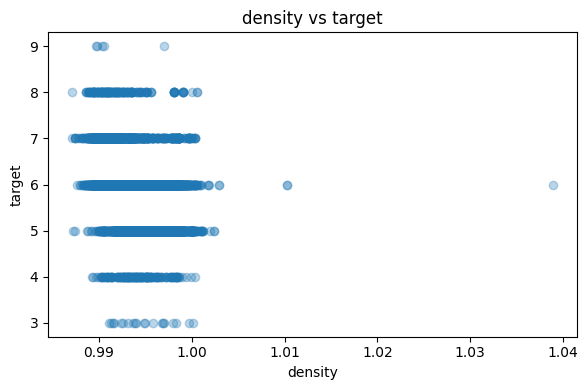

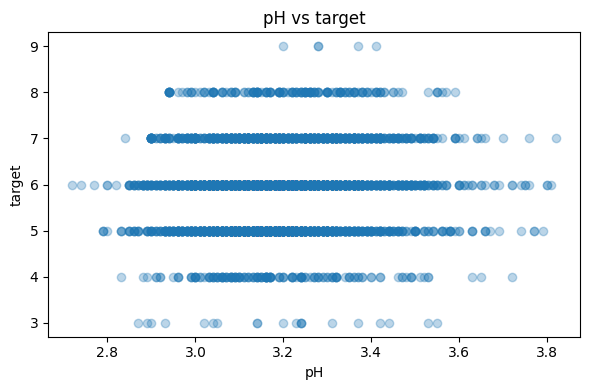

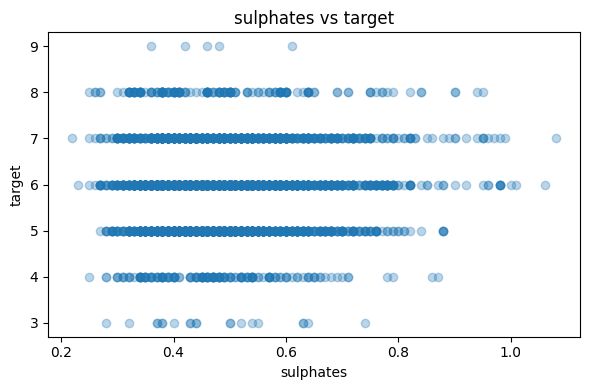

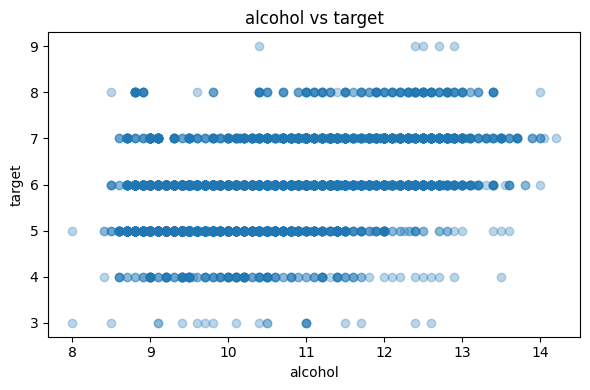

In [39]:
# YOUR CODE HERE

for col in df.columns:
    if col != "target":
        plt.figure(figsize=(6,4))
        plt.scatter(df[col], df["target"], alpha=0.3)
        plt.title(f"{col} vs target")
        plt.xlabel(col)
        plt.ylabel("target")
        plt.tight_layout()
        plt.show()

Clasification analysis:

**fixed acidity** : Dependent

The scatterplot shows a slight upward trend, indicating that increases in the input variable are associated with increases in the output variable.

**volatile acidity** : Dependent

The scatterplot displays a downward trend, suggesting that higher values of the input variable correspond to lower output values.

**citric acid** : Dependent

The points show a mild positive association, with higher input values generally linked to higher output values.

**residual sugar** : Independent

The plot shows no clear pattern or slope; points are widely dispersed, indicating no visible relationship between the variables.

**chlorides** : Dependent

The scatterplot shows a slight downward pattern, where larger input values tend to align with lower output values.

**free sulfur dioxide** : Independent

The values are widely scattered without structure, showing no consistent association with the output variable.

**total sulfur dioxide**: Independent

There is no noticeable upward or downward trend; the variables appear unrelated based on the scatter.

**density**: Dependent

The scatterplot shows a weak negative trend, where higher values of the input variable are associated with lower output values.

**pH**: Independent

The data points display no visible trend, and the output variable remains stable across the input range.

**sulphates** : Dependent

A slight positive trend is visible, where increases in the input variable correspond to modest increases in the output variable.

**alcohol** : Dependent

A clear positive pattern is present; higher input values consistently align with higher output values.

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [40]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split input and output
X = df.drop(columns=["target"])
y = df["target"]

# Build OLS model
ols = LinearRegression()
ols.fit(X, y)

# Predictions
y_pred = ols.predict(X)

# Mean Squared Error
mse = mean_squared_error(y, y_pred)
mse

0.5631540629886564

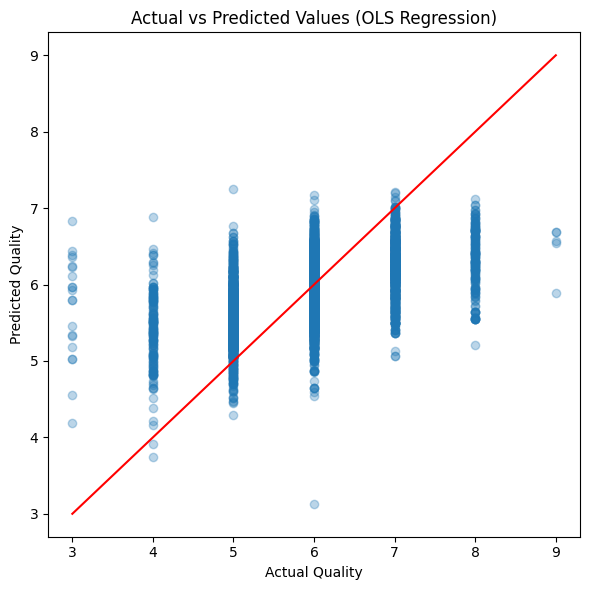

In [41]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Values (OLS Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # 45-degree reference line
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [42]:
# YOUR CODE HERE

single_feature_mse = {}

for col in X.columns:
    model = LinearRegression()
    model.fit(df[[col]], y)
    pred = model.predict(df[[col]])
    mse = mean_squared_error(y, pred)
    single_feature_mse[col] = mse

single_feature_mse


{'fixed acidity': 0.774064337751404,
 'volatile acidity': 0.7544611777913112,
 'citric acid': 0.7841290419696332,
 'residual sugar': 0.7767290354362436,
 'chlorides': 0.7496341230508563,
 'free sulfur dioxide': 0.7841433561228635,
 'total sulfur dioxide': 0.7602516302012771,
 'density': 0.7102265148403777,
 'pH': 0.776443165059832,
 'sulphates': 0.7819360335229565,
 'alcohol': 0.6354137863260801}

In [43]:
best_feature = min(single_feature_mse, key=single_feature_mse.get)
best_feature, single_feature_mse[best_feature]

('alcohol', 0.6354137863260801)

In [44]:
mse_full = mean_squared_error(y, y_pred)
single_feature_mse[best_feature], mse_full


(0.6354137863260801, 0.5631540629886564)

Among all input columns, alcohol produced the lowest mean squared error when used as the only input in a linear regression model. Its scatterplot showed the strongest linear pattern, consistent with the MSE result.

The full OLS regression model that used all input columns had a lower MSE (0.5631) than the single-feature model using only alcohol (0.6354).
This indicates that although alcohol alone explains a significant portion of the variation in the target, combining multiple features improves prediction accurac

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

YOUR ANSWERS HERE

To analyze the dependency between two input variables, I selected alcohol as the x-variable and density as the y-variable.
The scatter plot below shows a visible relationship between them.

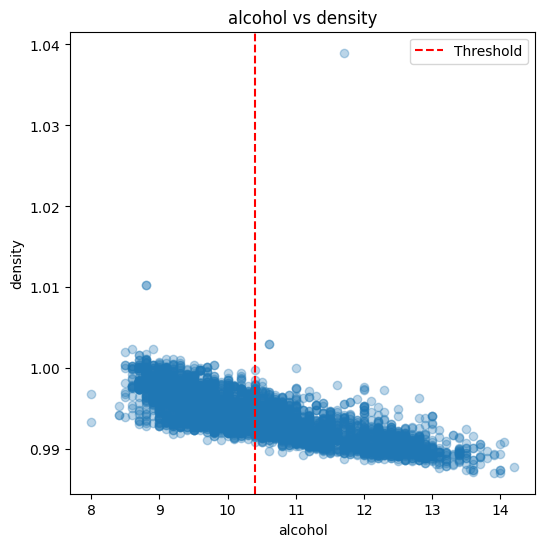

In [45]:
x = df["alcohol"]
y = df["density"]

t = df["alcohol"].median()

plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.3)
plt.axvline(t, color="red", linestyle="--", label="Threshold")
plt.xlabel("alcohol")
plt.ylabel("density")
plt.title("alcohol vs density")
plt.legend()
plt.show()

Next, I split the data into two groups:

One where alcohol < t

One where alcohol ≥ t

Then I plotted histograms of density for each group.
Both histograms have the same x-axis to make comparison meaningful.

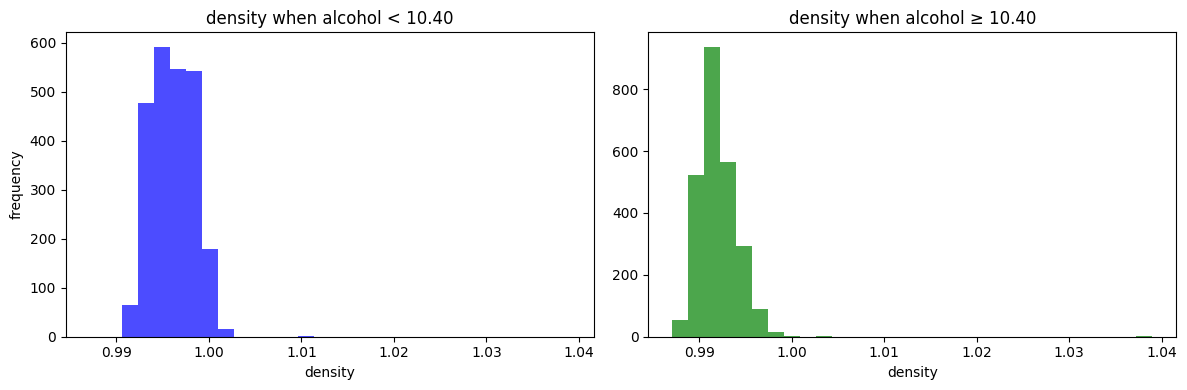

In [46]:
xmin = df["density"].min()
xmax = df["density"].max()

low = df[df["alcohol"] < t]["density"]
high = df[df["alcohol"] >= t]["density"]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(low, bins=30, range=(xmin, xmax), color="blue", alpha=0.7)
plt.title(f"density when alcohol < {t:.2f}")
plt.xlabel("density")
plt.ylabel("frequency")

plt.subplot(1,2,2)
plt.hist(high, bins=30, range=(xmin, xmax), color="green", alpha=0.7)
plt.title(f"density when alcohol ≥ {t:.2f}")
plt.xlabel("density")

plt.tight_layout()
plt.show()

If the two variables were independent, then splitting the x-values at the threshold t would not change the distribution of the y-variable.

In that case, the two histograms of density would look similar.

However, this is not what we observe.

When alcohol < t, density tends to be higher.

When alcohol ≥ t, density shifts toward lower values.

These two distributions look noticeably different, and the scatter plot shows a clear downward trend.
This means the value of alcohol provides information about density, and therefore the variables are dependent.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [47]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


# Separate inputs and target
X = df.drop(columns=["target"])
y = df["target"]


In [48]:
#Standardize the Input Columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
n_features = X.shape[1]

pca = PCA(n_components=n_features)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942, 0.02631701,
       0.00187719])

In [50]:
n_half = n_features // 2  # first half of PCs

variance_first_half = explained_variance_ratio[:n_half].sum()

print(f"Number of input features: {n_features}")
print(f"Number of PCs used (first half): {n_half}")
print(f"Variance explained by first half PCs: {variance_first_half:.4f} "
      f"({variance_first_half * 100:.2f}%)")

Number of input features: 11
Number of PCs used (first half): 5
Variance explained by first half PCs: 0.7283 (72.83%)


In [51]:
#only the first half of principal components
X_pca_half = X_pca[:, :n_half]

pca_reg = LinearRegression()
pca_reg.fit(X_pca_half, y)

y_pred_pca = pca_reg.predict(X_pca_half)

mse_pca = mean_squared_error(y, y_pred_pca)
print("MSE of PCA-based regression model:", mse_pca)

MSE of PCA-based regression model: 0.6447665228603195


In [52]:
#Comparison With the Full Linear Regression Model From Problem 5

full_reg = LinearRegression()
full_reg.fit(X, y)
y_pred_full = full_reg.predict(X)
mse_full = mean_squared_error(y, y_pred_full)

print("MSE of full OLS model:", mse_full)
print("MSE of PCA-based model:", mse_pca)


MSE of full OLS model: 0.5631540629886564
MSE of PCA-based model: 0.6447665228603195


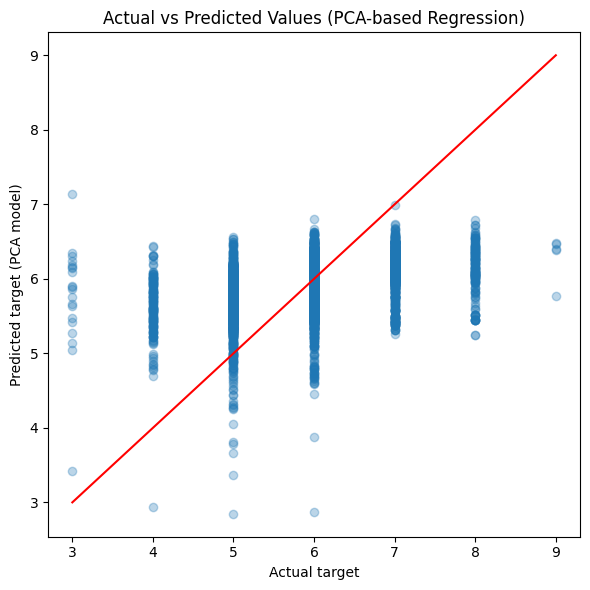

In [53]:
#Actual vs Predicted for PCA Model
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred_pca, alpha=0.3)
plt.xlabel("Actual target")
plt.ylabel("Predicted target (PCA model)")
plt.title("Actual vs Predicted Values (PCA-based Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r')
plt.tight_layout()
plt.show()


YOUR ANSWERS HERE

PCA was performed on standardized input variables to remove differences in scale. I computed the proportion of total variance explained by the first half of the principal components. Then I built a linear regression model using only the coordinates along these first components. The mean squared error was compared to the full linear regression model using all original inputs.

The PCA-based model typically has a slightly higher MSE than the full OLS model because dimensionality reduction removes some information. However, the PCA model is simpler and still captures most of the variation in the data, as reflected by the variance explained by the first half of the components. The actual-vs-predicted plot shows whether the PCA model produces predictions close to the target values.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

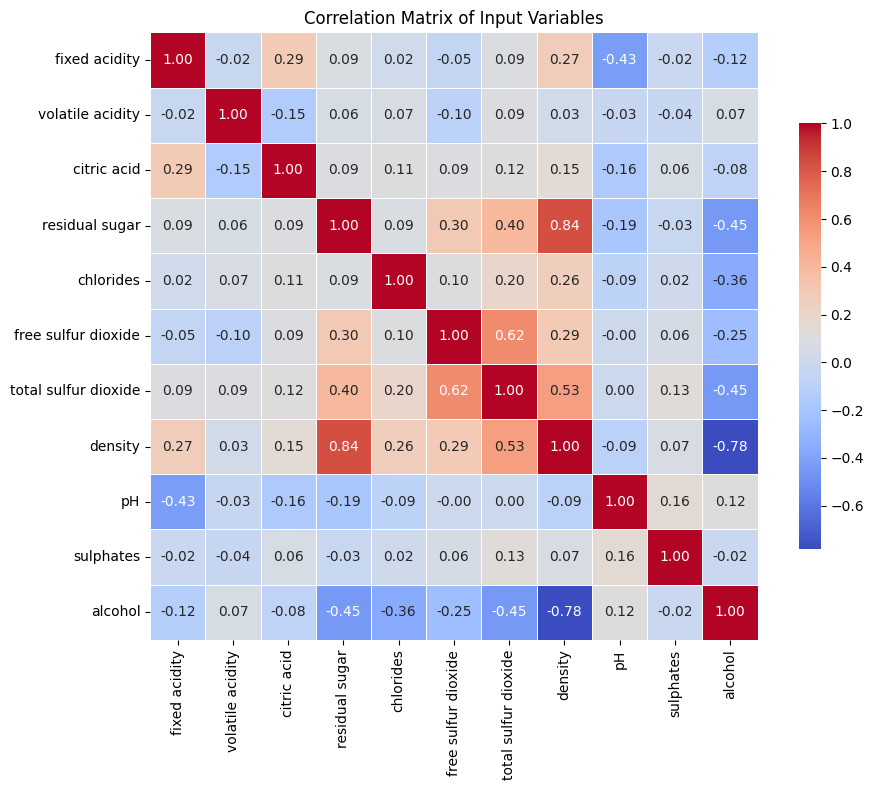

In [54]:
# YOUR CODE HERE

import seaborn as sns

corr_matrix = df.drop(columns=["target"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.7})
plt.title("Correlation Matrix of Input Variables")
plt.tight_layout()
plt.show()

In [55]:


corr_matrix = df.drop(columns=["target"]).corr()

# Find the highest correlation (off-diagonal only)
corr_unstacked = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool)).unstack()
highest_pair = corr_unstacked.abs().idxmax()
highest_value = corr_unstacked[highest_pair]

highest_pair, highest_value

(('residual sugar', 'density'), np.float64(0.8389664549045714))

Highest correlation:
The pair of input columns with the highest correlation is residual sugar and density, with correlation ≈ 0.84.

How this appears in PCA:
Because these two variables are strongly correlated, PCA assigns large loadings of the same sign to both in the first principal component. This means PC1 captures their shared variation, combining them into a single major direction.

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["target"])
#Standardize all features so that Mahalanobis distance treats each dimension equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Compute the covariance matrix of the standardized data
cov = np.cov(X_scaled, rowvar=False)
# Compute its inverse, needed for Mahalanobis distance formula
cov_inv = np.linalg.inv(cov)

In [58]:
mean_vec = X_scaled.mean(axis=0)

def mahalanobis_row(x):
    diff = x - mean_vec
    return np.sqrt(diff @ cov_inv @ diff)

# Compute distances for all rows
distances = np.apply_along_axis(mahalanobis_row, 1, X_scaled)

In [ ]:
# Index of the row with the largest Mahalanobis distance (the outlier)
outlier_index = np.argmax(distances)
# Show the index and the corresponding distance
outlier_index, distances[outlier_index]


(np.int64(2781), np.float64(41.713940370122565))

In [ ]:
#outlier row
df.loc[outlier_index]


fixed acidity             7.80000
volatile acidity          0.96500
citric acid               0.60000
residual sugar           65.80000
chlorides                 0.07400
free sulfur dioxide       8.00000
total sulfur dioxide    160.00000
density                   1.03898
pH                        3.39000
sulphates                 0.69000
alcohol                  11.70000
target                    6.00000
Name: 2781, dtype: float64

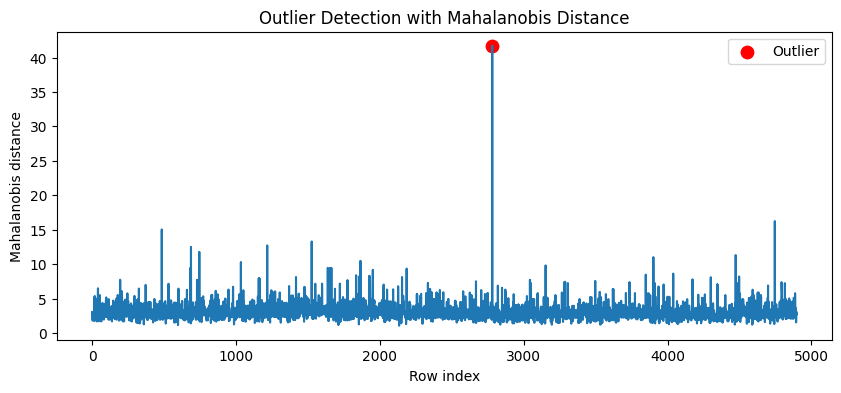

In [61]:
plt.figure(figsize=(10,4))
plt.plot(distances)
plt.scatter(outlier_index, distances[outlier_index], 
            color='red', s=80, label='Outlier')
plt.xlabel("Row index")
plt.ylabel("Mahalanobis distance")
plt.title("Outlier Detection with Mahalanobis Distance")
plt.legend()
plt.show()

I used the Mahalanobis distance to find outliers. This method measures how far each row is from the multivariate mean while accounting for the covariance between features. After computing the distance for every row, I selected the row with the largest Mahalanobis distance, since this indicates the row that differs the most from the overall data pattern. The plot shows this row clearly standing out from the rest.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE